In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from os import path
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.linear_model import LinearRegression

labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]
data_dir= path.join("Data", "wsj")

### Preparing data

In [2]:
#Initialise data dictionary with column names and empty lists
data = { "stemmer" : [], "QID" : [], "nDCG" : []}
data_avg = {"stemmer" : [], "nDCG" : []}
QID = np.concatenate((np.arange(100,201),np.arange(51,100)))
values = list()
values_avg = list()
queryTotal = 0
with open(path.join(data_dir,"ndcg-wsj.csv"), "r") as f:
    for line in f:
        queryTotal+=1
        if queryTotal > 150:
            values_avg.append(float(line.strip()))
            queryTotal = 0
            continue
        values.append(float(line.strip()))
i = 0
for stemmer in labels:
    data["nDCG"].extend(values[150*i:150*(i+1)])
    data["stemmer"].extend([stemmer for _ in QID])
    data["QID"].extend(QID)
    i+=1
data_avg["nDCG"].extend(values_avg)
data_avg["stemmer"].extend(labels)
nDCG = pd.DataFrame(data)
nDCG_avg = pd.DataFrame(data_avg)
display(nDCG_avg)

,stemmer,nDCG
0,paiceHusk,0.5789
1,krovetz,0.5855
2,sStripping,0.5630
3,porter2,0.5878
4,lovins,0.5729
5,wikt,0.5863
6,none,0.5371


In [3]:
#Initialise data dictionary with column names and empty lists
data = { "stemmer" : [], "QID" : [], "MAP" : []}
data_avg = {"stemmer" : [], "MAP" : []}
QID = np.concatenate((np.arange(100,201),np.arange(51,100)))
values = list()
values_avg = list()
queryTotal = 0
with open(path.join(data_dir,"map-wsj.csv"), "r") as f:
    for line in f:
        queryTotal+=1
        if queryTotal > 150:
            values_avg.append(float(line.strip()))
            queryTotal = 0
            continue
        values.append(float(line.strip()))
i = 0
for stemmer in labels:
    data["MAP"].extend(values[150*i:150*(i+1)])
    data["stemmer"].extend([stemmer for _ in QID])
    data["QID"].extend(QID)
    i+=1
data_avg["MAP"].extend(values_avg)
data_avg["stemmer"].extend(labels)
MAP_all = pd.DataFrame(data)
MAP_avg = pd.DataFrame(data_avg)
display(MAP_avg)

,stemmer,MAP
0,paiceHusk,0.2710
1,krovetz,0.2816
2,sStripping,0.2587
3,porter2,0.2829
4,lovins,0.2655
5,wikt,0.2817
6,none,0.2386


In [4]:
df = pd.merge(nDCG_avg,MAP_avg)
df = df.melt(id_vars="stemmer").rename({"variable" : "measure"}, axis=1)
display(df)

,stemmer,measure,value
0,paiceHusk,nDCG,0.5789
1,krovetz,nDCG,0.5855
2,sStripping,nDCG,0.5630
3,porter2,nDCG,0.5878
4,lovins,nDCG,0.5729
5,wikt,nDCG,0.5863
6,none,nDCG,0.5371
7,paiceHusk,MAP,0.2710
8,krovetz,MAP,0.2816
9,sStripping,MAP,0.2587


## MAP and nDCG 

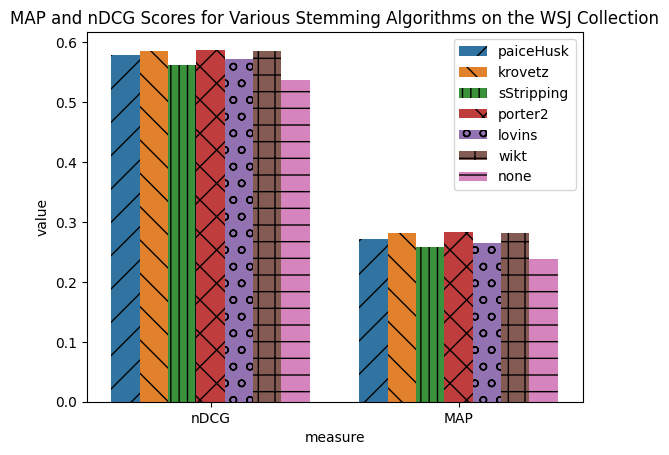

In [5]:
ax = sns.barplot(x="measure", y="value", hue="stemmer", data=df)
hatches = itertools.cycle([ "/", "\\", "||", "x", "o", "+", "-"])
num_stemmers = 2
for i, bar in enumerate(ax.patches):
    if i % num_stemmers == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
ax.legend(loc="best")
plt.title("MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection")
plt.show()

## Average F-Measure vs MAP and Average F-Measure vs nDCG

In [6]:
from os import path

data_dir = path.join("Data","wikt")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins"]

paiceHusk_cluster_fmeasures = np.loadtxt(path.join(data_dir, "paiceHusk_cluster_fmeasures.csv"))
krovetz_cluster_fmeasures = np.loadtxt(path.join(data_dir, "krovetz_cluster_fmeasures.csv"))
sStripping_cluster_fmeasures = np.loadtxt(path.join(data_dir, "sStripping_cluster_fmeasures.csv"))
porter2_cluster_fmeasures = np.loadtxt(path.join(data_dir, "porter2_cluster_fmeasures.csv"))
lovins_cluster_fmeasures = np.loadtxt(path.join(data_dir, "lovins_cluster_fmeasures.csv"))

before = [paiceHusk_cluster_fmeasures, krovetz_cluster_fmeasures, sStripping_cluster_fmeasures, porter2_cluster_fmeasures, lovins_cluster_fmeasures]

averages = list()
for stemmer in before:
    averages.append(stemmer.mean())

data = {
    "stemmer" : labels[:],
    "fmeasure" : averages,
    "marker" : ["o","^","s","*","d"]
}

average_fmeasures = pd.DataFrame(data=data)
display(average_fmeasures)

,stemmer,fmeasure,marker
0,paiceHusk,0.811475,o
1,krovetz,0.747436,^
2,sStripping,0.619239,s
3,porter2,0.772651,*
4,lovins,0.778938,d


In [7]:
merged_df = df[df["stemmer"] != "none"]
merged_df = df[df["stemmer"] != "wikt"]
merged_df = merged_df.merge(average_fmeasures)
merged_df

,stemmer,measure,value,fmeasure,marker
0,paiceHusk,nDCG,0.5789,0.811475,o
1,paiceHusk,MAP,0.2710,0.811475,o
2,krovetz,nDCG,0.5855,0.747436,^
3,krovetz,MAP,0.2816,0.747436,^
4,sStripping,nDCG,0.5630,0.619239,s
5,sStripping,MAP,0.2587,0.619239,s
6,porter2,nDCG,0.5878,0.772651,*
7,porter2,MAP,0.2829,0.772651,*
8,lovins,nDCG,0.5729,0.778938,d
9,lovins,MAP,0.2655,0.778938,d


### MAP

R^2: 0.3064168661096043
Pearson's R: 0.5535493348470445 (pVal: 0.333061189403067)


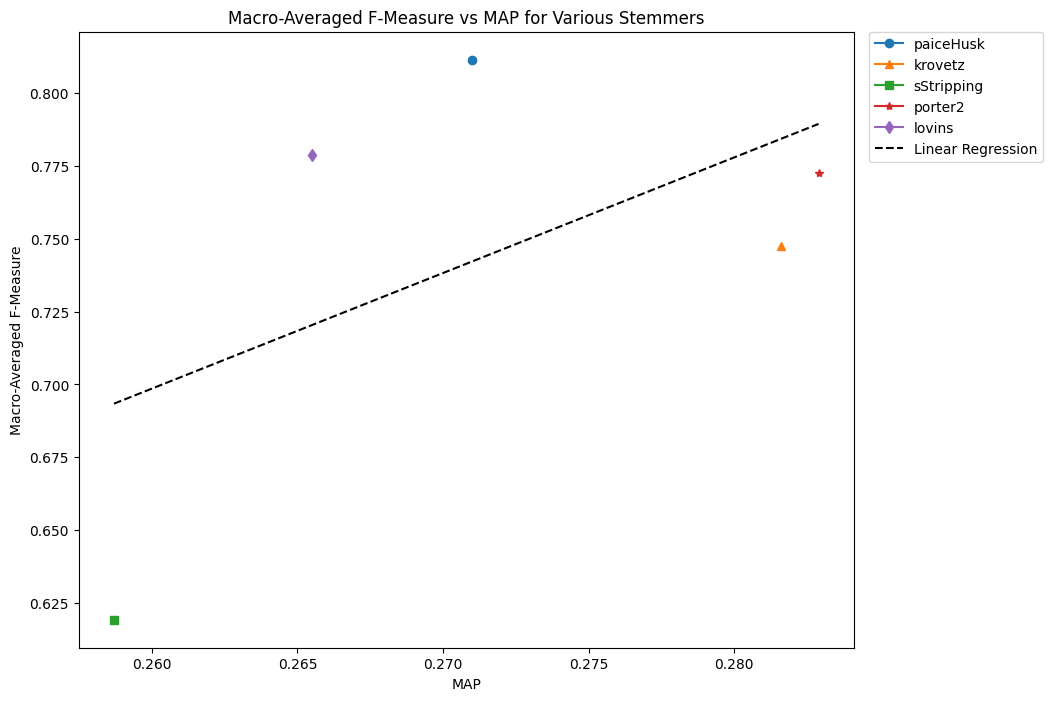

In [8]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

TARGET_COL = "MAP"
target_df = merged_df[merged_df["measure"]==TARGET_COL]
target_df_sorted = target_df.sort_values(by="value")
X = target_df_sorted["value"].to_numpy().reshape(-1,1)
y = target_df_sorted["fmeasure"].to_numpy()

linearRegression = LinearRegression().fit(X,y)
print(f"R^2: {linearRegression.score(X, y)}")

pearsonrResult = pearsonr(X.squeeze(), y)
print(f"Pearson's R: {pearsonrResult.statistic} (pVal: {pearsonrResult.pvalue})")
plt.figure(figsize=(10,8))
for _, row in target_df.iterrows():
    plt.plot(row["value"], row["fmeasure"], marker=row["marker"], label=row["stemmer"])

y_pred = linearRegression.coef_*X+linearRegression.intercept_
plt.plot(X, y_pred, "k--", label=f"Linear Regression")
plt.title(f"Macro-Averaged F-Measure vs {TARGET_COL} for Various Stemmers")
plt.xlabel("MAP")
plt.ylabel("Macro-Averaged F-Measure")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()

### nDCG

R^2: 0.4768281009535684
Pearson's R: 0.6905274078221428 (pVal: 0.19678909689285418)


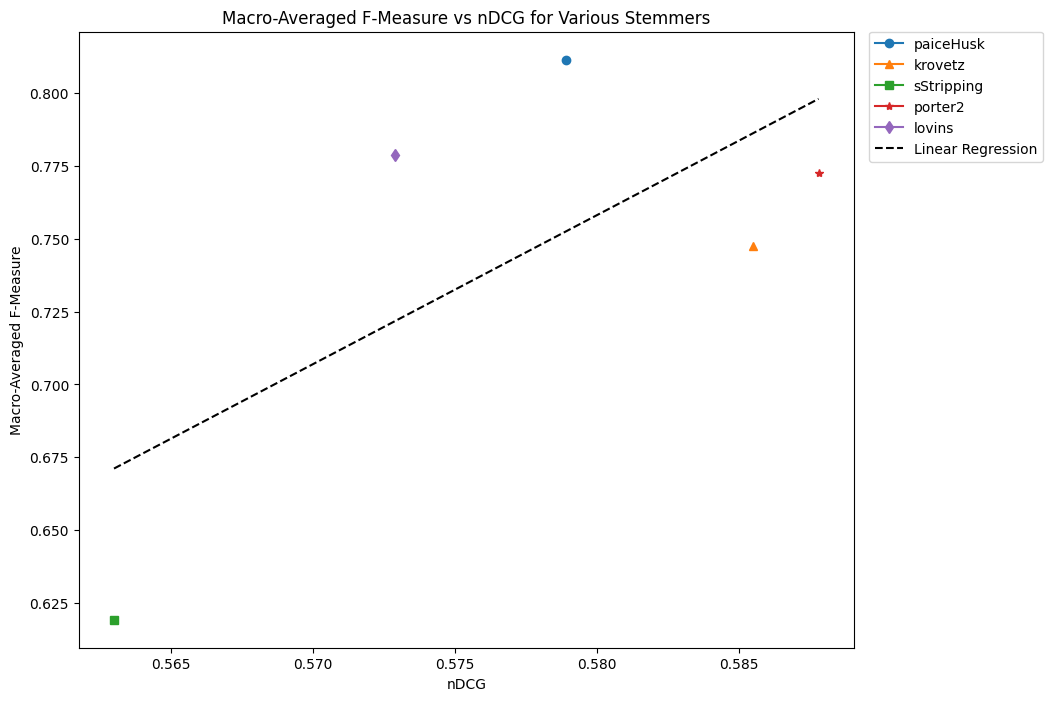

In [10]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

TARGET_COL = "nDCG"
target_df = merged_df[merged_df["measure"]==TARGET_COL]
target_df_sorted = target_df.sort_values(by="value")
X = target_df_sorted["value"].to_numpy().reshape(-1,1)
y = target_df_sorted["fmeasure"].to_numpy()

linearRegression = LinearRegression().fit(X,y)
print(f"R^2: {linearRegression.score(X, y)}")

pearsonrResult = pearsonr(X.squeeze(), y)
print(f"Pearson's R: {pearsonrResult.statistic} (pVal: {pearsonrResult.pvalue})")
plt.figure(figsize=(10,8))
# i=0
for _, row in target_df.iterrows():
    plt.plot(row["value"], row["fmeasure"], marker=row["marker"], label=row["stemmer"])
    # i+=1

y_pred = linearRegression.coef_*X+linearRegression.intercept_
plt.plot(X, y_pred, "k--", label=f"Linear Regression")
plt.title(f"Macro-Averaged F-Measure vs {TARGET_COL} for Various Stemmers")
plt.xlabel("nDCG")
plt.ylabel("Macro-Averaged F-Measure")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()

## Statistical Significance

In [59]:
#t-test between the porter2 stemmer (one of the best performing) and no stemming
porter = list()
none = list()
porter = nDCG[nDCG["stemmer"] == "porter2"].loc[:,"nDCG"].tolist()
none = nDCG[nDCG["stemmer"] == "none"].loc[:,"nDCG"].tolist()
print(f"{stats.ttest_rel(porter,none)}")

TtestResult(statistic=4.804085717576779, pvalue=3.754471300792621e-06, df=149)


In [11]:
#t-test between sStripping (worst stemmer) and no stemming
lovins = list()
none = list()
lovins = nDCG[nDCG["stemmer"] == "sStripping"].loc[:,"nDCG"].tolist()
none = nDCG[nDCG["stemmer"] == "none"].loc[:,"nDCG"].tolist()
print(f"{stats.ttest_rel(lovins,none)}")

TtestResult(statistic=4.280917064668427, pvalue=3.3176915211952985e-05, df=149)
